In [1]:
# !pip install cython

In [2]:
# !pip install pystan

  Using cached pystan-3.3.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.2.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.1.1-py3-none-any.whl (13 kB)
  Using cached pystan-3.1.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.0.2-py3-none-any.whl (13 kB)
  Using cached pystan-3.0.1-py3-none-any.whl (12 kB)
  Using cached pystan-3.0.0-py3-none-any.whl (12 kB)


In [3]:
# !pip install "pystan<2.18"

  Running setup.py clean for pystan
Failed to build pystan
  Attempting uninstall: pystan
    Found existing installation: pystan 2.19.1.1
    Uninstalling pystan-2.19.1.1:
      Successfully uninstalled pystan-2.19.1.1
    Running setup.py install for pystan: started
    Running setup.py install for pystan: finished with status 'error'
  Rolling back uninstall of pystan
  Moving to c:\users\bitcamp\anaconda3\envs\nlp\lib\site-packages\pystan-2.19.1.1.dist-info\
   from c:\users\bitcamp\anaconda3\envs\nlp\lib\site-packages\~ystan-2.19.1.1.dist-info
  Moving to c:\users\bitcamp\anaconda3\envs\nlp\lib\site-packages\pystan\
   from c:\users\bitcamp\anaconda3\envs\nlp\lib\site-packages\~ystan


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

    copying pystan\stan\lib\stan_math\lib\boost_1.64.0\boost\mpl\copy_if.hpp -> build\lib.win-amd64-3.7\pystan\stan\lib\stan_math\lib\boost_1.64.0\boost\mpl
    copying pystan\stan\lib\stan_math\lib\boost_1.64.0\boost\mpl\count.hpp -> build\lib.win-amd64-3.7\pystan\stan\lib\stan_math\lib\boost_1.64.0\boost\mpl
    copying pystan\stan\lib\stan_math\lib\boost_1.64.0\boost\mpl\count_fwd.hpp -> build\lib.win-amd64-3.7\pystan\stan\lib\stan_math\lib\boost_1.64.0\boost\mpl
    copying pystan\stan\lib\stan_math\lib\boost_1.64.0\boost\mpl\count_if.hpp -> build\lib.win-amd64-3.7\pystan\stan\lib\stan_math\lib\boost_1.64.0\boost\mpl
    copying pystan\stan\lib\stan_math\lib\b

In [8]:
# !pip install fbprophet

In [5]:
# !pip install plotly

  Using cached tenacity-8.0.1-py3-none-any.whl (24 kB)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import matplotlib as mpl
import matplotlib.font_manager as fm
from matplotlib import font_manager, rc

mpl.rcParams['axes.unicode_minus'] = False

path = 'C:/Windows/Fonts/GOTHICI.TTF'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)

In [2]:
import fbprophet
from datetime import datetime

from tensorflow.keras.layers import Input, Dense, Conv1D, MaxPooling1D, UpSampling1D, BatchNormalization, LSTM, RepeatVector
from tensorflow.keras.layers import Activation, LeakyReLU, Reshape, Flatten, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.models import model_from_json
from tensorflow.keras import regularizers

from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm

import tensorflow as tf
from tensorflow.keras import Model ,models, layers, optimizers, utils

In [30]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, plot_components_plotly
import FinanceDataReader as fdr

# Fbprophet

In [4]:
kospi = pd.read_csv('c:/Users/bitcamp/Desktop/final_data/업종별/업종지수/코스피_지수.csv', index_col=0)

In [5]:
kospi

시가        고가        저가        종가         5        10        20  \
일자                                                                             
Jun-22  2,670.74  2,681.51  2,457.39  2,492.97  2,666.15  2,785.03  2,920.78   
May-22  2,669.21  2,702.10  2,546.80  2,685.90  2,700.22  2,855.66  2,909.49   
Apr-22  2,745.85  2,769.18  2,615.50  2,695.05  2,758.57  2,907.30  2,891.59   
Mar-22  2,698.31  2,765.20  2,605.81  2,757.65  2,787.37  2,967.46  2,873.15   
Feb-22  2,706.34  2,788.27  2,642.63  2,699.18  2,829.97  3,012.09  2,847.74   
...          ...       ...       ...       ...       ...       ...       ...   
May-83    132.91    134.46    123.61    125.76    123.75       NaN       NaN   
Apr-83    120.03    131.44    119.48    131.44       NaN       NaN       NaN   
Mar-83    121.84    122.59     118.1     119.8       NaN       NaN       NaN   
Feb-83    118.03     123.9    118.03     123.5       NaN       NaN       NaN   
Jan-83    122.52    122.81    117.05    118.27       NaN       NaN       NaN   

              60       120         거래량            5.1           10.1  \
일자                                                                     
Jun-22  2,455.57  2,232.96   5,049,316  13,693,706.00  13,203,008.90   
May-22  2,453.89  2,227.63  16,868,003  14,868,966.60  14,078,170.20   
Apr-22  2,448.25  2,220.61  22,025,887  13,628,488.80  14,603,075.50   
Mar-22  2,440.09  2,214.67  14,407,386  11,981,125.80  15,935,940.90   
Feb-22  2,430.13  2,208.47  10,117,938  11,881,995.20  16,374,233.70   
...          ...       ...         ...            ...            ...   
May-83       NaN       NaN   3,038,620   2,910,860.00            NaN   
Apr-83       NaN       NaN   4,382,980            NaN            NaN   
Mar-83       NaN       NaN   2,133,740            NaN            NaN   
Feb-83       NaN       NaN   2,343,470            NaN            NaN   
Jan-83       NaN       NaN   2,655,490            NaN            NaN   

                 20.1           60.1          120.1  
일자                                                   
Jun-22  19,306,200.15  13,469,627.08  10,582,847.43  
May-22  19,839,013.15  13,510,203.27  10,602,958.75  
Apr-22  19,975,957.80  13,346,209.17  10,545,911.29  
Mar-22  19,756,819.55  13,107,935.07  10,451,090.09  
Feb-22  19,979,789.50  13,015,645.23  10,417,983.97  
...               ...            ...            ...  
May-83            NaN            NaN            NaN  
Apr-83            NaN            NaN            NaN  
Mar-83            NaN            NaN            NaN  
Feb-83            NaN            NaN            NaN  
Jan-83            NaN            NaN            NaN  

[474 rows x 15 columns]

In [6]:
kospi_df = kospi.copy()

In [7]:
kospi_df.dropna(inplace=True)

In [8]:
stock = pd.DataFrame()
stock['y'] = kospi_df[['5']]
stock['ds'] = kospi_df.index

In [9]:
stock.reset_index(drop=True, inplace=True)

In [10]:
stock.ds = pd.to_datetime(stock.ds, format="%b-%y")

In [11]:
stock['y'] = stock['y'].apply(lambda x:x.replace(',',''))
stock['y'] = stock['y'].astype('float64')

In [12]:
stock.ds = stock.ds.astype('str')

In [13]:
stock.ds = stock.ds.apply(lambda x:x[:7])

In [14]:
stock

y       ds
0    2666.15  2022-06
1    2700.22  2022-05
2    2758.57  2022-04
3    2787.37  2022-03
4    2829.97  2022-02
..       ...      ...
350   676.06  1993-04
351   664.41  1993-03
352   654.18  1993-02
353   628.35  1993-01
354   606.80  1992-12

[355 rows x 2 columns]

In [15]:
stock = stock[::-1]

In [16]:
stock_index = stock.set_index('ds')

findfont: Font family ['Century Gothic'] not found. Falling back to DejaVu Sans.


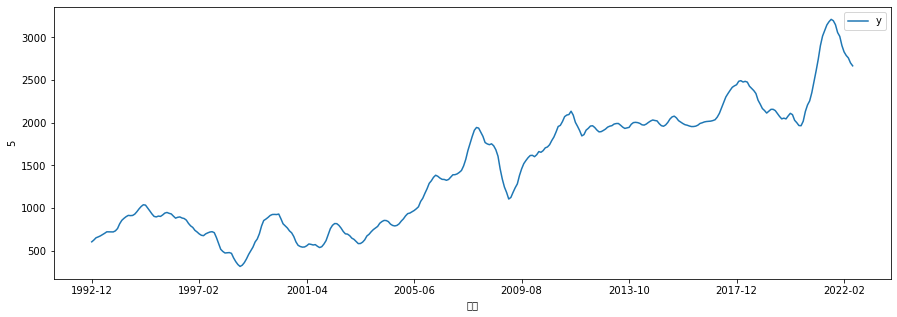

In [17]:
stock_index.plot(figsize=(15,5))
plt.xlabel('일자')
plt.ylabel('5')
plt.show()

In [18]:
stock.reset_index(drop=True, inplace=True)

In [19]:
train = stock[stock.ds < '2021-01']
test = stock[stock.ds > '2020-12']

In [20]:
df_prophet = Prophet(changepoint_prior_scale=0.15, daily_seasonality=True)
df_prophet.fit(train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [21]:
fcast_time = 19
df_forecast = df_prophet.make_future_dataframe(periods=fcast_time, freq='m')
df_forecast.tail(10)

ds
346 2021-09-30
347 2021-10-31
348 2021-11-30
349 2021-12-31
350 2022-01-31
351 2022-02-28
352 2022-03-31
353 2022-04-30
354 2022-05-31
355 2022-06-30

In [22]:
df_forecast = df_prophet.predict(df_forecast)

In [23]:
df_forecast.ds = df_forecast.ds.astype('str')
df_forecast.ds = df_forecast.ds.apply(lambda x:x[:7])

In [24]:
df_forecast

ds        trend   yhat_lower   yhat_upper  trend_lower  trend_upper  \
0    1992-12   646.278622   611.586533  1004.066587   646.278622   646.278622   
1    1993-01   647.745092   588.595557   970.635973   647.745092   647.745092   
2    1993-02   649.211562   586.694446   977.635883   649.211562   649.211562   
3    1993-03   650.536116   632.315192  1027.872787   650.536116   650.536116   
4    1993-04   652.002587   634.845858  1027.115452   652.002587   652.002587   
..       ...          ...          ...          ...          ...          ...   
351  2022-02  2146.251938  1991.479673  2366.859523  2126.599390  2162.874174   
352  2022-03  2149.625230  2075.351989  2477.636192  2127.267521  2168.937564   
353  2022-04  2152.889706  2123.145284  2539.607470  2127.788091  2173.921654   
354  2022-05  2156.262998  2157.108715  2536.113556  2127.746146  2179.217981   
355  2022-06  2159.527474  2173.888028  2569.311831  2129.102438  2185.697631   

     additive_terms  additive_terms_lower  additive_terms_upper       daily  \
0        160.657565            160.657565            160.657565  178.229556   
1        132.384850            132.384850            132.384850  178.229556   
2        126.981638            126.981638            126.981638  178.229556   
3        168.114667            168.114667            168.114667  178.229556   
4        166.377857            166.377857            166.377857  178.229556   
..              ...                   ...                   ...         ...   
351       40.988157             40.988157             40.988157  178.229556   
352      136.204951            136.204951            136.204951  178.229556   
353      181.342149            181.342149            181.342149  178.229556   
354      198.716143            198.716143            198.716143  178.229556   
355      215.674894            215.674894            215.674894  178.229556   

     daily_lower  daily_upper      yearly  yearly_lower  yearly_upper  \
0     178.229556   178.229556  -17.571991    -17.571991    -17.571991   
1     178.229556   178.229556  -45.844707    -45.844707    -45.844707   
2     178.229556   178.229556  -51.247918    -51.247918    -51.247918   
3     178.229556   178.229556  -10.114890    -10.114890    -10.114890   
4     178.229556   178.229556  -11.851700    -11.851700    -11.851700   
..           ...          ...         ...           ...           ...   
351   178.229556   178.229556 -137.241400   -137.241400   -137.241400   
352   178.229556   178.229556  -42.024605    -42.024605    -42.024605   
353   178.229556   178.229556    3.112593      3.112593      3.112593   
354   178.229556   178.229556   20.486586     20.486586     20.486586   
355   178.229556   178.229556   37.445338     37.445338     37.445338   

     multiplicative_terms  multiplicative_terms_lower  \
0                     0.0                         0.0   
1                     0.0                         0.0   
2                     0.0                         0.0   
3                     0.0                         0.0   
4                     0.0                         0.0   
..                    ...                         ...   
351                   0.0                         0.0   
352                   0.0                         0.0   
353                   0.0                         0.0   
354                   0.0                         0.0   
355                   0.0                         0.0   

     multiplicative_terms_upper         yhat  
0                           0.0   806.936186  
1                           0.0   780.129942  
2                           0.0   776.193201  
3                           0.0   818.650783  
4                           0.0   818.380443  
..                          ...          ...  
351                         0.0  2187.240094  
352                         0.0  2285.830181  
353                         0.0  2334.231855  
354                         0.0  2354.979141  
355      

In [25]:
df_forecast.ds.value_counts()

2020-12    2
1992-12    1
2012-06    1
2013-02    1
2013-01    1
          ..
2002-08    1
2002-07    1
2002-06    1
2002-05    1
2022-06    1
Name: ds, Length: 355, dtype: int64

In [26]:
df_forecast['ds'] = df_forecast['ds'].astype('datetime64')

In [27]:
df_forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

ds         yhat   yhat_lower   yhat_upper
351 2022-02-01  2187.240094  1991.479673  2366.859523
352 2022-03-01  2285.830181  2075.351989  2477.636192
353 2022-04-01  2334.231855  2123.145284  2539.607470
354 2022-05-01  2354.979141  2157.108715  2536.113556
355 2022-06-01  2375.202369  2173.888028  2569.311831

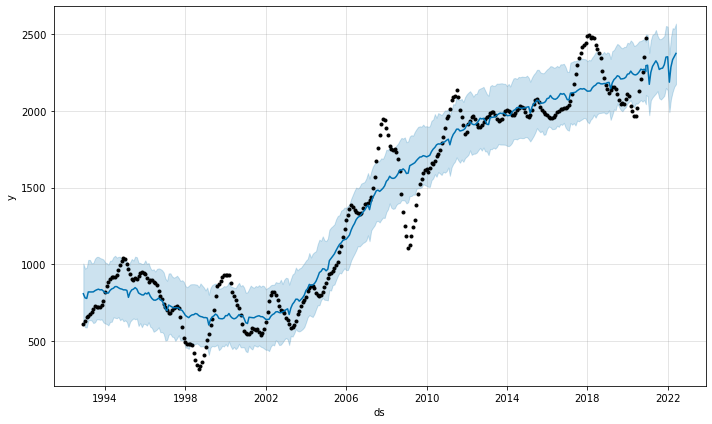

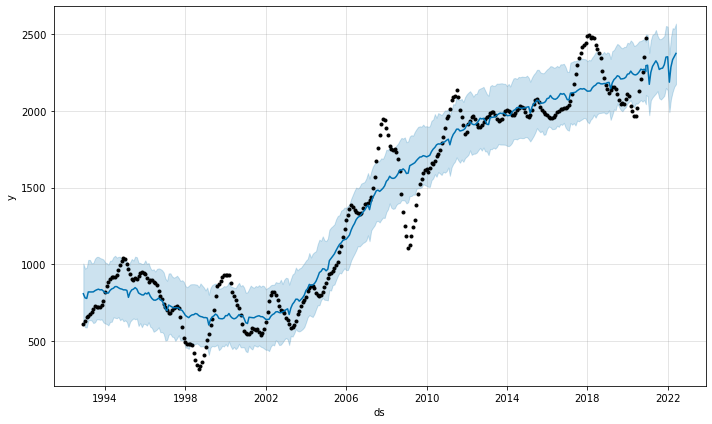

In [28]:
df_prophet.plot(df_forecast)

## kospi 예측

findfont: Font family ['Century Gothic'] not found. Falling back to DejaVu Sans.


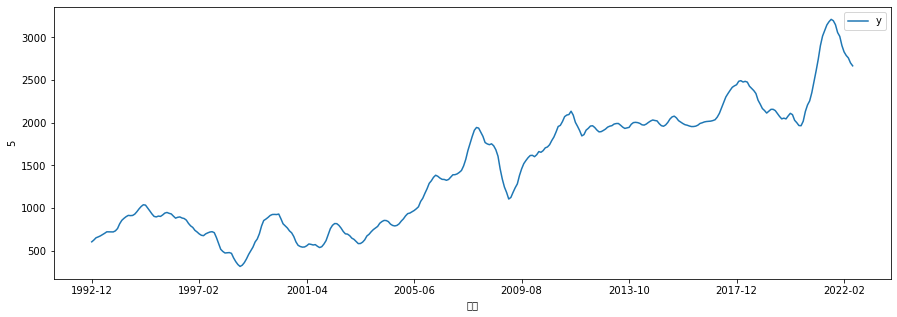

In [4]:
kospi = pd.read_csv('c:/Users/bitcamp/Desktop/final_data/업종별/업종지수/코스피_지수.csv', index_col=0)
kospi_df = kospi.copy()
kospi_df.dropna(inplace=True)

stock = pd.DataFrame()
stock['y'] = kospi_df[['5']]
stock['ds'] = kospi_df.index

stock.reset_index(drop=True, inplace=True)
result_li = []
for date in stock.ds:
    result = datetime.strptime(date, '%b-%y').strftime('%Y-%m')
    result_li.append(result)
stock.ds = result_li
    
stock['y'] = stock['y'].apply(lambda x:x.replace(',',''))
stock['y'] = stock['y'].astype('float64')

# stock.ds = stock.ds.astype('str')
# stock.ds = stock.ds.apply(lambda x:x[:7])

stock = stock[::-1]
stock_index = stock.set_index('ds')

stock_index.plot(figsize=(15,5))
plt.xlabel('일자')
plt.ylabel('5')
plt.show()

In [15]:
stock.reset_index(drop=True, inplace=True)

train = stock[stock.ds < '2021-01']
test = stock[stock.ds > '2021-01']

df_prophet = Prophet(changepoint_prior_scale=0.15, daily_seasonality=True)
df_prophet.fit(train)

fcast_time = 19
df_forecast = df_prophet.make_future_dataframe(periods=fcast_time, freq='m')
# df_forecast.tail(50)
df_forecast = df_prophet.predict(df_forecast)

df_forecast.ds = df_forecast.ds.astype('str')
df_forecast.ds = df_forecast.ds.apply(lambda x:x[:7])

df_forecast['ds'] = df_forecast['ds'].astype('datetime64')

df_forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

# df_prophet.plot(df_forecast)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


ds         yhat   yhat_lower   yhat_upper
351 2022-02-01  2187.240094  1988.427143  2372.615240
352 2022-03-01  2285.830181  2084.023248  2469.552467
353 2022-04-01  2334.231855  2135.834504  2536.035625
354 2022-05-01  2354.979141  2158.435219  2565.226388
355 2022-06-01  2375.202369  2170.843418  2581.245339

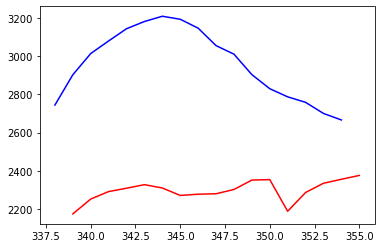

In [177]:
yabal_df = df_forecast[df_forecast.ds > '2021']
plt.plot(test.y, 'b')
plt.plot(yabal_df.yhat, 'r')
plt.show()

In [13]:
df_forecast[-1:]

ds        trend   yhat_lower   yhat_upper  trend_lower  \
355 2022-06-01  2159.527474  2176.695893  2569.718916  2135.767283   

     trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
355  2187.584442      215.674894            215.674894            215.674894   

          daily  daily_lower  daily_upper     yearly  yearly_lower  \
355  178.229556   178.229556   178.229556  37.445338     37.445338   

     yearly_upper  multiplicative_terms  multiplicative_terms_lower  \
355     37.445338                   0.0                         0.0   

     multiplicative_terms_upper         yhat  
355                         0.0  2375.202369

In [158]:
test

y       ds
452  2607.21  2021-01
453  2744.22  2021-02
454  2903.08  2021-03
455  3014.38  2021-04
456  3080.47  2021-05
457  3144.57  2021-06
458  3182.44  2021-07
459  3210.01  2021-08
460  3194.20  2021-09
461  3147.55  2021-10
462  3056.02  2021-11
463  3011.09  2021-12
464  2903.90  2022-01
465  2829.97  2022-02
466  2787.37  2022-03
467  2758.57  2022-04
468  2700.22  2022-05
469  2666.15  2022-06

In [159]:
yabal_df['yhat']

453    2292.407481
454    2207.100366
455    2255.284983
456    2295.867583
457    2301.247885
458    2312.204036
459    2296.984927
460    2273.803673
461    2283.848108
462    2289.175952
463    2289.106222
464    2333.241397
465    2343.488690
466    2228.866517
467    2289.550179
468    2339.013585
469    2345.046278
470    2356.457651
Name: yhat, dtype: float64

In [32]:
kospi = fdr.DataReader('KS11')
kospi_df = kospi[['Close']]

stock = pd.DataFrame()
stock['y'] = kospi_df[['Close']]
stock['ds'] = kospi_df.index

stock.reset_index(drop=True, inplace=True)

train = stock[stock.ds < '2021-01']
test = stock[stock.ds > '2021-01']

df_prophet = Prophet(changepoint_prior_scale=0.15, daily_seasonality=True)
df_prophet.fit(train)

fcast_time = 100
df_forecast = df_prophet.make_future_dataframe(periods=fcast_time, freq='D')
# df_forecast.tail(50)
df_forecast = df_prophet.predict(df_forecast)

kospi_updow_df = df_forecast[['ds','yhat','yhat_lower','yhat_upper']]
#     kospi_updow_df['ds'] = kospi_updow_df['ds'].astype('datetime64')

kospi_1 = str(kospi_updow_df[kospi_updow_df['ds'] == '2022.03.30']['yhat_upper'].values)
kospi_1 = kospi_1.strip('[]')[:4]

kospi_2 = str(kospi_updow_df[kospi_updow_df['ds'] == '2022-03-30']['yhat_upper'].values)
kospi_2 = kospi_2.strip('[]')[:4]

n = int(kospi_2) - int(kospi_1)

if n > 0:
    print('코스피지수가 상승할 예정입니다.')
else :
    print('코스피지수가 하락할 예정입니다.')

ValueError: invalid literal for int() with base 10: ''

# autoencoder

In [174]:
kospi = pd.read_csv('c:/Users/bitcamp/Desktop/final_data/업종별/업종지수/코스피_지수.csv', index_col=0)
kospi_df.dropna(inplace=True)

stock_close = pd.DataFrame()
stock_close['price'] = kospi_df[['5']]

window_length = 10
encoding_dim = 3
epochs = 100
test_samples = 141

stock = stock_close[::-1]
stock.index = pd.to_datetime(stock.index, format="%b-%y")

train = stock[stock.index < '2021-01']
test = stock[stock.index > '2020-12']

In [185]:
train.shape

(452, 1)

In [186]:
autoencoder = Sequential()
autoencoder.add(Conv1D(16, 3, input_shape=(452,1), padding='same', activation='relu'))
autoencoder.add(MaxPooling1D(2, padding='same')) 
autoencoder.add(Conv1D(1, 3, activation='relu', padding='same'))
autoencoder.add(MaxPooling1D(2, padding='same')) 


autoencoder.add(Conv1D(1, 3, padding='same', activation='relu'))
autoencoder.add(UpSampling1D(2)) 
autoencoder.add(Conv1D(16, 2, activation='relu')) 
autoencoder.add(UpSampling1D(2))
autoencoder.add(Conv1D(1, 3, activation='sigmoid', padding='same')) 

In [187]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
hist = autoencoder.fit(train, train, epochs=100, batch_size=100, validation_data=(test, test))

Epoch 1/100


UnimplementedError: Graph execution error:

Detected at node 'binary_crossentropy/Cast' defined at (most recent call last):
    File "C:\Users\bitcamp\Anaconda3\envs\nlp\lib\runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "C:\Users\bitcamp\Anaconda3\envs\nlp\lib\runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "C:\Users\bitcamp\Anaconda3\envs\nlp\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\bitcamp\Anaconda3\envs\nlp\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "C:\Users\bitcamp\Anaconda3\envs\nlp\lib\site-packages\ipykernel\kernelapp.py", line 707, in start
      self.io_loop.start()
    File "C:\Users\bitcamp\Anaconda3\envs\nlp\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\bitcamp\Anaconda3\envs\nlp\lib\asyncio\base_events.py", line 541, in run_forever
      self._run_once()
    File "C:\Users\bitcamp\Anaconda3\envs\nlp\lib\asyncio\base_events.py", line 1786, in _run_once
      handle._run()
    File "C:\Users\bitcamp\Anaconda3\envs\nlp\lib\asyncio\events.py", line 88, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\bitcamp\Anaconda3\envs\nlp\lib\site-packages\ipykernel\kernelbase.py", line 502, in dispatch_queue
      await self.process_one()
    File "C:\Users\bitcamp\Anaconda3\envs\nlp\lib\site-packages\ipykernel\kernelbase.py", line 491, in process_one
      await dispatch(*args)
    File "C:\Users\bitcamp\Anaconda3\envs\nlp\lib\site-packages\ipykernel\kernelbase.py", line 398, in dispatch_shell
      await result
    File "C:\Users\bitcamp\Anaconda3\envs\nlp\lib\site-packages\ipykernel\kernelbase.py", line 722, in execute_request
      reply_content = await reply_content
    File "C:\Users\bitcamp\Anaconda3\envs\nlp\lib\site-packages\ipykernel\ipkernel.py", line 389, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\bitcamp\Anaconda3\envs\nlp\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\bitcamp\Anaconda3\envs\nlp\lib\site-packages\IPython\core\interactiveshell.py", line 2958, in run_cell
      raw_cell, store_history, silent, shell_futures)
    File "C:\Users\bitcamp\Anaconda3\envs\nlp\lib\site-packages\IPython\core\interactiveshell.py", line 3003, in _run_cell
      return runner(coro)
    File "C:\Users\bitcamp\Anaconda3\envs\nlp\lib\site-packages\IPython\core\async_helpers.py", line 78, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\bitcamp\Anaconda3\envs\nlp\lib\site-packages\IPython\core\interactiveshell.py", line 3229, in run_cell_async
      interactivity=interactivity, compiler=compiler, result=result)
    File "C:\Users\bitcamp\Anaconda3\envs\nlp\lib\site-packages\IPython\core\interactiveshell.py", line 3444, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "C:\Users\bitcamp\Anaconda3\envs\nlp\lib\site-packages\IPython\core\interactiveshell.py", line 3524, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\bitcamp\AppData\Local\Temp\ipykernel_17136\2046614565.py", line 2, in <module>
      hist = autoencoder.fit(train, train, epochs=100, batch_size=100, validation_data=(test, test))
    File "C:\Users\bitcamp\Anaconda3\envs\nlp\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\bitcamp\Anaconda3\envs\nlp\lib\site-packages\keras\engine\training.py", line 1384, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\bitcamp\Anaconda3\envs\nlp\lib\site-packages\keras\engine\training.py", line 1021, in train_function
      return step_function(self, iterator)
    File "C:\Users\bitcamp\Anaconda3\envs\nlp\lib\site-packages\keras\engine\training.py", line 1010, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\bitcamp\Anaconda3\envs\nlp\lib\site-packages\keras\engine\training.py", line 1000, in run_step
      outputs = model.train_step(data)
    File "C:\Users\bitcamp\Anaconda3\envs\nlp\lib\site-packages\keras\engine\training.py", line 860, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\bitcamp\Anaconda3\envs\nlp\lib\site-packages\keras\engine\training.py", line 919, in compute_loss
      y, y_pred, sample_weight, regularization_losses=self.losses)
    File "C:\Users\bitcamp\Anaconda3\envs\nlp\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\bitcamp\Anaconda3\envs\nlp\lib\site-packages\keras\losses.py", line 141, in __call__
      losses = call_fn(y_true, y_pred)
    File "C:\Users\bitcamp\Anaconda3\envs\nlp\lib\site-packages\keras\losses.py", line 245, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\bitcamp\Anaconda3\envs\nlp\lib\site-packages\keras\losses.py", line 1922, in binary_crossentropy
      y_true = tf.cast(y_true, y_pred.dtype)
Node: 'binary_crossentropy/Cast'
Cast string to float is not supported
	 [[{{node binary_crossentropy/Cast}}]] [Op:__inference_train_function_6283]

In [177]:
mse_model = Sequential()
mse_model.add(layers.LSTM(encoding_dim, activation='relu', input_shape=(10, 1)))
mse_model.add(layers.RepeatVector(10))
mse_model.add(layers.LSTM(1, activation='relu', return_sequences=True))
mse_model.add(layers.TimeDistributed(Dense(1)))

In [178]:
mse_model.compile(optimizer='adam', loss='mse')
hist = mse_model.fit(train, train, epochs=100, batch_size=100, shuffle=True, validation_data=(test, test))

Epoch 1/100


UnimplementedError: Graph execution error:

Detected at node 'mean_squared_error/Cast' defined at (most recent call last):
    File "C:\Users\bitcamp\Anaconda3\envs\nlp\lib\runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "C:\Users\bitcamp\Anaconda3\envs\nlp\lib\runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "C:\Users\bitcamp\Anaconda3\envs\nlp\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\bitcamp\Anaconda3\envs\nlp\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "C:\Users\bitcamp\Anaconda3\envs\nlp\lib\site-packages\ipykernel\kernelapp.py", line 707, in start
      self.io_loop.start()
    File "C:\Users\bitcamp\Anaconda3\envs\nlp\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\bitcamp\Anaconda3\envs\nlp\lib\asyncio\base_events.py", line 541, in run_forever
      self._run_once()
    File "C:\Users\bitcamp\Anaconda3\envs\nlp\lib\asyncio\base_events.py", line 1786, in _run_once
      handle._run()
    File "C:\Users\bitcamp\Anaconda3\envs\nlp\lib\asyncio\events.py", line 88, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\bitcamp\Anaconda3\envs\nlp\lib\site-packages\ipykernel\kernelbase.py", line 502, in dispatch_queue
      await self.process_one()
    File "C:\Users\bitcamp\Anaconda3\envs\nlp\lib\site-packages\ipykernel\kernelbase.py", line 491, in process_one
      await dispatch(*args)
    File "C:\Users\bitcamp\Anaconda3\envs\nlp\lib\site-packages\ipykernel\kernelbase.py", line 398, in dispatch_shell
      await result
    File "C:\Users\bitcamp\Anaconda3\envs\nlp\lib\site-packages\ipykernel\kernelbase.py", line 722, in execute_request
      reply_content = await reply_content
    File "C:\Users\bitcamp\Anaconda3\envs\nlp\lib\site-packages\ipykernel\ipkernel.py", line 389, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\bitcamp\Anaconda3\envs\nlp\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\bitcamp\Anaconda3\envs\nlp\lib\site-packages\IPython\core\interactiveshell.py", line 2958, in run_cell
      raw_cell, store_history, silent, shell_futures)
    File "C:\Users\bitcamp\Anaconda3\envs\nlp\lib\site-packages\IPython\core\interactiveshell.py", line 3003, in _run_cell
      return runner(coro)
    File "C:\Users\bitcamp\Anaconda3\envs\nlp\lib\site-packages\IPython\core\async_helpers.py", line 78, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\bitcamp\Anaconda3\envs\nlp\lib\site-packages\IPython\core\interactiveshell.py", line 3229, in run_cell_async
      interactivity=interactivity, compiler=compiler, result=result)
    File "C:\Users\bitcamp\Anaconda3\envs\nlp\lib\site-packages\IPython\core\interactiveshell.py", line 3444, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "C:\Users\bitcamp\Anaconda3\envs\nlp\lib\site-packages\IPython\core\interactiveshell.py", line 3524, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\bitcamp\AppData\Local\Temp\ipykernel_17136\1682133969.py", line 2, in <module>
      hist = mse_model.fit(train, train, epochs=100, batch_size=100, shuffle=True, validation_data=(test, test))
    File "C:\Users\bitcamp\Anaconda3\envs\nlp\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\bitcamp\Anaconda3\envs\nlp\lib\site-packages\keras\engine\training.py", line 1384, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\bitcamp\Anaconda3\envs\nlp\lib\site-packages\keras\engine\training.py", line 1021, in train_function
      return step_function(self, iterator)
    File "C:\Users\bitcamp\Anaconda3\envs\nlp\lib\site-packages\keras\engine\training.py", line 1010, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\bitcamp\Anaconda3\envs\nlp\lib\site-packages\keras\engine\training.py", line 1000, in run_step
      outputs = model.train_step(data)
    File "C:\Users\bitcamp\Anaconda3\envs\nlp\lib\site-packages\keras\engine\training.py", line 860, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\bitcamp\Anaconda3\envs\nlp\lib\site-packages\keras\engine\training.py", line 919, in compute_loss
      y, y_pred, sample_weight, regularization_losses=self.losses)
    File "C:\Users\bitcamp\Anaconda3\envs\nlp\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\bitcamp\Anaconda3\envs\nlp\lib\site-packages\keras\losses.py", line 141, in __call__
      losses = call_fn(y_true, y_pred)
    File "C:\Users\bitcamp\Anaconda3\envs\nlp\lib\site-packages\keras\losses.py", line 245, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\bitcamp\Anaconda3\envs\nlp\lib\site-packages\keras\losses.py", line 1328, in mean_squared_error
      y_true = tf.cast(y_true, y_pred.dtype)
Node: 'mean_squared_error/Cast'
Cast string to float is not supported
	 [[{{node mean_squared_error/Cast}}]] [Op:__inference_train_function_3410]

In [182]:
train

price
일자                  
1983-05-01    123.75
1983-06-01    124.59
1983-07-01     124.9
1983-08-01     124.7
1983-09-01    121.95
...              ...
2020-08-01  2,132.21
2020-09-01  2,208.27
2020-10-01  2,255.78
2020-11-01  2,352.38
2020-12-01  2,477.20

[452 rows x 1 columns]